In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lume_live_demo import demo
import pandas as pd

# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'



# Logging

In [3]:
PREFIX = 'lume-impact-live-demo-sc_inj'

import logging
import sys
import os

# Gets or creates a logger
logger = logging.getLogger(PREFIX)  

# set log level
logger.setLevel(logging.INFO)

# define file handler and set formatter
file_handler = logging.FileHandler(f'{PREFIX}.log')
#formatter    = logging.Formatter('%(asctime)s : %(levelname)s : %(name)s : %(message)s')
formatter    = logging.Formatter(fmt="%(asctime)s :  %(name)s : %(message)s ", datefmt="%Y-%m-%dT%H:%M:%S%z")

# Add print to stdout
logger.addHandler(logging.StreamHandler(sys.stdout))

file_handler.setFormatter(formatter)

# add file handler to logger
logger.addHandler(file_handler)

# Config

In [4]:
import toml

In [5]:
CONFIG_STRING = """

[model]
name="sc_inj"

[run_settings]
numprocs= 8
mpi_run="/Users/chrisonian/Code/mambaforge/envs/devel/bin/mpirun -n {nproc} {command_mpi}"
timeout =10000

[settings]

 total_charge = 1 # SC On
# total_charge = 0 # Debug

'distgen:n_particle'= 10_000
'header:Nx'= 32
'header:Ny'= 32
'header:Nz'= 32
stop = 14
"distgen:t_dist:sigma_t:value" = 6.794055201698514 # 16 ps / 2.355, equivalent to 16ps FWHM from Feng

[input]
impact_config="$LCLS_LATTICE/impact/models/sc_inj/v1/ImpactT.yaml"
distgen_input_file="$LCLS_LATTICE/distgen/models/sc_inj/vcc_image/distgen.yaml"
# workdir="output"

[pv_mapping]
CSV = "pv_mapping/sc_inj_impact.csv"

[dashboard_kwargs]
name = 'lume-impact-live-demo-sc_inj'
screen2 = "CM01BEG"
screen3 = "BEAM0"
ylim =  [0.0, 3.0e-6]  # Emittance scale   
ylim2 =  [0, 10]  # sigma_x scale                    

[vcc]
vcc_device = 'CAMR:LGUN:950' # LCLS-II 
good_image_std = 4
fclip = 0.27

[output]
summary_output_dir="summary"
plot_output_dir="plot"
archive_dir="archive"
snapshot_dir="snapshot"

[other]
min_charge_pC = 10
distgen_laser_file="output/distgen_laser.txt"




"""
CONFIG = toml.loads(CONFIG_STRING)
CONFIG

{'model': {'name': 'sc_inj'},
 'run_settings': {'numprocs': 8,
  'mpi_run': '/Users/chrisonian/Code/mambaforge/envs/devel/bin/mpirun -n {nproc} {command_mpi}',
  'timeout': 10000},
 'settings': {'total_charge': 1,
  'distgen:n_particle': 10000,
  'header:Nx': 32,
  'header:Ny': 32,
  'header:Nz': 32,
  'stop': 14,
  'distgen:t_dist:sigma_t:value': 6.794055201698514},
 'input': {'impact_config': '$LCLS_LATTICE/impact/models/sc_inj/v1/ImpactT.yaml',
  'distgen_input_file': '$LCLS_LATTICE/distgen/models/sc_inj/vcc_image/distgen.yaml'},
 'pv_mapping': {'CSV': 'pv_mapping/sc_inj_impact.csv'},
 'dashboard_kwargs': {'name': 'lume-impact-live-demo-sc_inj',
  'screen2': 'CM01BEG',
  'screen3': 'BEAM0',
  'ylim': [0.0, 3e-06],
  'ylim2': [0, 10]},
 'vcc': {'vcc_device': 'CAMR:LGUN:950', 'good_image_std': 4, 'fclip': 0.27},
 'output': {'summary_output_dir': 'summary',
  'plot_output_dir': 'plot',
  'archive_dir': 'archive',
  'snapshot_dir': 'snapshot'},
 'other': {'min_charge_pC': 10,
  'distgen

# PV Mapping

In [6]:
CONFIG['pv_mapping']['CSV']

'pv_mapping/sc_inj_impact.csv'

In [7]:
demo.vcc_device_pvlist(CONFIG['vcc']['vcc_device'])

['CAMR:LGUN:950:Image:ArrayData',
 'CAMR:LGUN:950:Image:ArraySize0_RBV',
 'CAMR:LGUN:950:Image:ArraySize1_RBV',
 'CAMR:LGUN:950:RESOLUTION',
 'CAMR:LGUN:950:RESOLUTION.EGU']

In [8]:
DF = pd.read_csv(CONFIG['pv_mapping']['CSV'])#.dropna()

PVLIST = list(DF['device_pv_name'].dropna()) 

# Add VCC
PVLIST = PVLIST + demo.vcc_device_pvlist(CONFIG['vcc']['vcc_device'])
#PVLIST

# EPICS Snapshot

## Live EPICS

In [9]:
import epics

In [10]:
MONITOR = {pvname:epics.PV(pvname) for pvname in PVLIST}

In [11]:
PVDATA, ITIME = demo.get_live_snapshot(MONITOR, good_image_std=CONFIG['vcc']['good_image_std'])
PVDATA

{'SOLN:GUNB:212:BACT': 0.044383597628357876,
 'SOLN:GUNB:823:BACT': 0.025070372116792285,
 'BPMS:GUNB:314:TMIT': 297685024.0,
 'ACCL:GUNB:455:AACT_AVG': 0.13417724227801486,
 'ACCL:GUNB:455:PACT_AVG': 7.002010762980567,
 'ACCL:L0B:0110:AACTMEAN': 6.709343233166183,
 'ACCL:L0B:0120:AACTMEAN': 0.0011298314045392881,
 'ACCL:L0B:0130:AACTMEAN': 7.009756701358853,
 'ACCL:L0B:0140:AACTMEAN': 14.019791655749893,
 'ACCL:L0B:0150:AACTMEAN': 14.019775189866566,
 'ACCL:L0B:0160:AACTMEAN': 14.019691569747897,
 'ACCL:L0B:0170:AACTMEAN': 12.016835062088463,
 'ACCL:L0B:0180:AACTMEAN': 12.017112195532622,
 'ACCL:L0B:0110:PACTMEAN': -0.0008774415407073466,
 'ACCL:L0B:0120:PACTMEAN': 77.67462156488212,
 'ACCL:L0B:0130:PACTMEAN': -0.0005129196702747529,
 'ACCL:L0B:0140:PACTMEAN': 1.9517816263858734e-05,
 'ACCL:L0B:0150:PACTMEAN': -0.00024390961346043571,
 'ACCL:L0B:0160:PACTMEAN': -0.00011931223087607856,
 'ACCL:L0B:0170:PACTMEAN': -0.001531148598248988,
 'ACCL:L0B:0180:PACTMEAN': 3.919561940668448e-05,


In [12]:
demo.save_pvdata('test_snapshot.h5', PVDATA, ITIME)

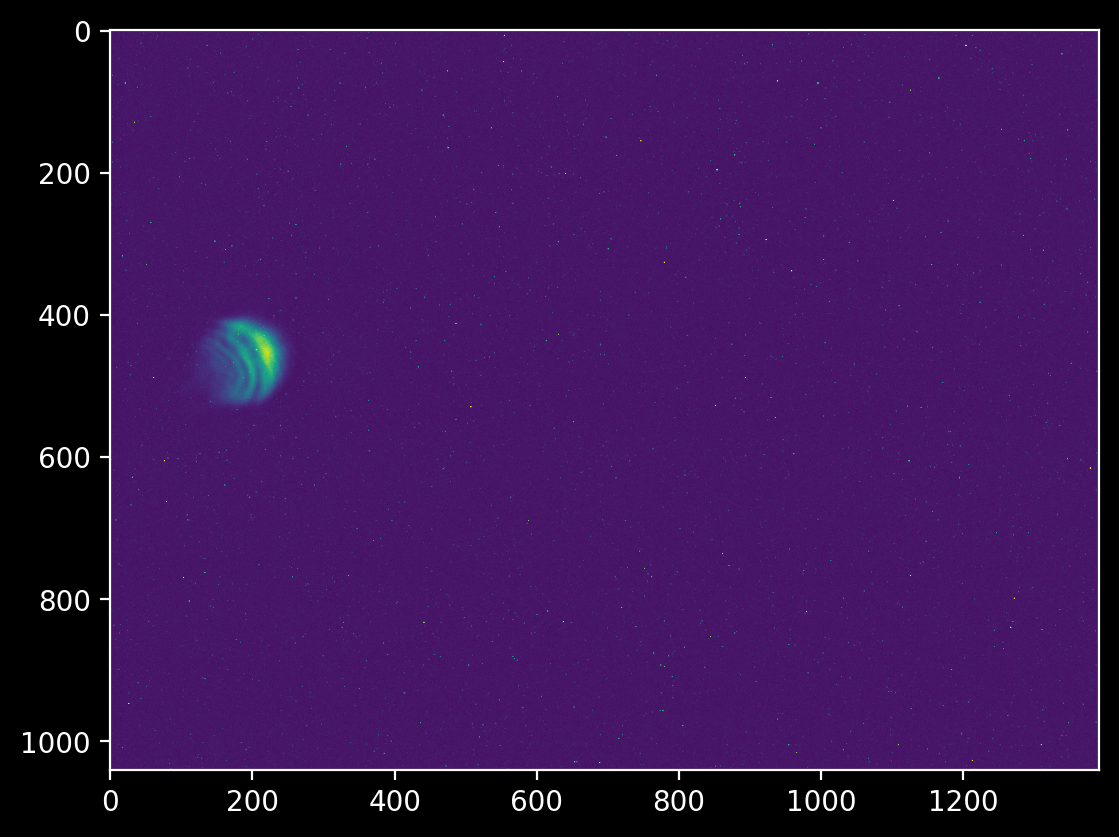

In [13]:
# Check image
a = PVDATA.get('CAMR:LGUN:950:Image:ArrayData').reshape((1040 , 1392))
plt.imshow(a, vmax=128)

## From File

In [14]:
PVDATA, ISOTIME = demo.load_pvdata('test_snapshot.h5')
PVDATA

{'ACCL:GUNB:455:AACT_AVG': array(0.13417724),
 'ACCL:GUNB:455:PACT_AVG': array(7.00201076),
 'ACCL:L0B:0110:AACTMEAN': array(6.70934323),
 'ACCL:L0B:0110:PACTMEAN': array(-0.00087744),
 'ACCL:L0B:0120:AACTMEAN': array(0.00112983),
 'ACCL:L0B:0120:PACTMEAN': array(77.67462156),
 'ACCL:L0B:0130:AACTMEAN': array(7.0097567),
 'ACCL:L0B:0130:PACTMEAN': array(-0.00051292),
 'ACCL:L0B:0140:AACTMEAN': array(14.01979166),
 'ACCL:L0B:0140:PACTMEAN': array(1.95178163e-05),
 'ACCL:L0B:0150:AACTMEAN': array(14.01977519),
 'ACCL:L0B:0150:PACTMEAN': array(-0.00024391),
 'ACCL:L0B:0160:AACTMEAN': array(14.01969157),
 'ACCL:L0B:0160:PACTMEAN': array(-0.00011931),
 'ACCL:L0B:0170:AACTMEAN': array(12.01683506),
 'ACCL:L0B:0170:PACTMEAN': array(-0.00153115),
 'ACCL:L0B:0180:AACTMEAN': array(12.0171122),
 'ACCL:L0B:0180:PACTMEAN': array(3.91956194e-05),
 'BPMS:GUNB:314:TMIT': array(2.97685024e+08),
 'CAMR:LGUN:950:Image:ArrayData': array([31, 33, 32, ..., 31, 32, 30], dtype=int16),
 'CAMR:LGUN:950:Image:Ar

# PVDATA to Simulation Settings

In [15]:
from lume_live_demo.demo import settings_from_pvdata

In [16]:
settings_from_pvdata(PVDATA, DF,
                    vcc_device=CONFIG['vcc']['vcc_device'],
                    distgen_laser_file = CONFIG['other']['distgen_laser_file'],
                    fclip = CONFIG['vcc']['fclip']
                    )
    

{'RFGUNB:rf_field_scale': 17646328.784236345,
 'RFGUNB:autophase_deg': 0.0,
 'SOL1B:solenoid_field_scale': 0.05146524269810384,
 'SOL2B:solenoid_field_scale': 0.029070486721836018,
 'distgen:total_charge:value': 47.62960384,
 'BUN1B:rf_field_scale': 1786301.125,
 'BUN1B:autophase_deg': -60.0,
 'CAVL011:rf_field_scale': 12492443.833106177,
 'CAVL012:rf_field_scale': 2103.6865862392115,
 'CAVL013:rf_field_scale': 13051797.893210588,
 'CAVL014:rf_field_scale': 26104113.878916252,
 'CAVL015:rf_field_scale': 26104083.220308475,
 'CAVL016:rf_field_scale': 26103927.524050362,
 'CAVL017:rf_field_scale': 22374714.163192194,
 'CAVL018:rf_field_scale': 22375230.17107331,
 'CAVL011:autophase_deg': -0.0008774415407073466,
 'CAVL012:autophase_deg': 77.67462156488212,
 'CAVL013:autophase_deg': -0.0005129196702747529,
 'CAVL014:autophase_deg': 1.9517816263858734e-05,
 'CAVL015:autophase_deg': -0.00024390961346043571,
 'CAVL016:autophase_deg': -0.00011931223087607856,
 'CAVL017:autophase_deg': -0.00153

# Run

In [17]:
from lume_live_demo.demo import run1                 

In [18]:
%%time
OUTPUT = run1(config=CONFIG, monitor_dict=MONITOR)   

Setting impact total_charge = 1
Setting distgen n_particle = 10000
Setting impact header:Nx = 32
Setting impact header:Ny = 32
Setting impact header:Nz = 32
Setting impact stop = 14
Removed element: stop_1
Set stop to s = 14
Setting distgen t_dist:sigma_t:value = 6.794055201698514
Setting impact numprocs = 8
Setting Npcol, Nprow = 4, 2
Enabling MPI
Setting impact mpi_run = /Users/chrisonian/Code/mambaforge/envs/devel/bin/mpirun -n {nproc} {command_mpi}
Setting impact timeout = 10000
Setting impact RFGUNB:rf_field_scale = 17646328.784236345
Setting impact RFGUNB:autophase_deg = 0.0
Setting impact SOL1B:solenoid_field_scale = 0.05146524269810384
Setting impact SOL2B:solenoid_field_scale = 0.029068740493917406
Setting distgen total_charge:value = 46.41212416
Setting impact BUN1B:rf_field_scale = 1786301.125
Setting impact BUN1B:autophase_deg = -60.0
Setting impact CAVL011:rf_field_scale = 12492441.181410352
Setting impact CAVL012:rf_field_scale = 2091.2236392650902
Setting impact CAVL013: